<a href="https://colab.research.google.com/github/philBram/tensorflow/blob/main/simple_binary_and_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Binary Classification</h1>

In [90]:
from sklearn.datasets import make_moons

X, y = make_moons(1000, noise=0.15)

df = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'labels': y})

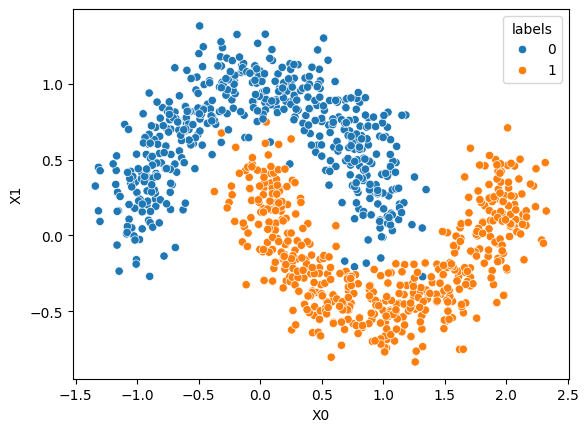

In [91]:
sns.scatterplot(df, x='X0', y='X1', hue='labels')

plt.show()

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
df_norm = pd.DataFrame({'X0': X_train[:, 0], 'X1': X_train[:, 1], 'labels': y_train})

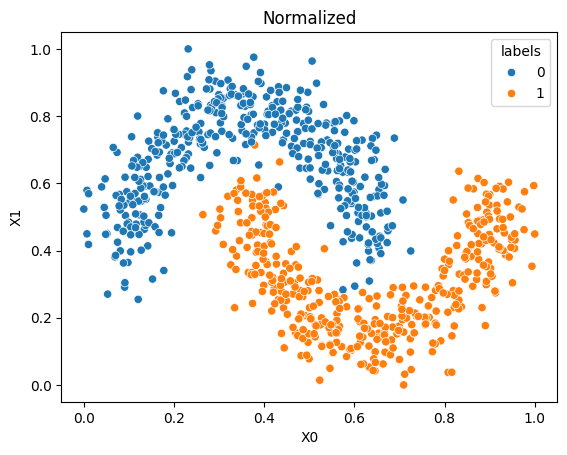

In [94]:
sns.scatterplot(df_norm, x='X0', y='X1', hue='labels')
plt.title('Normalized')

plt.show()

In [95]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)

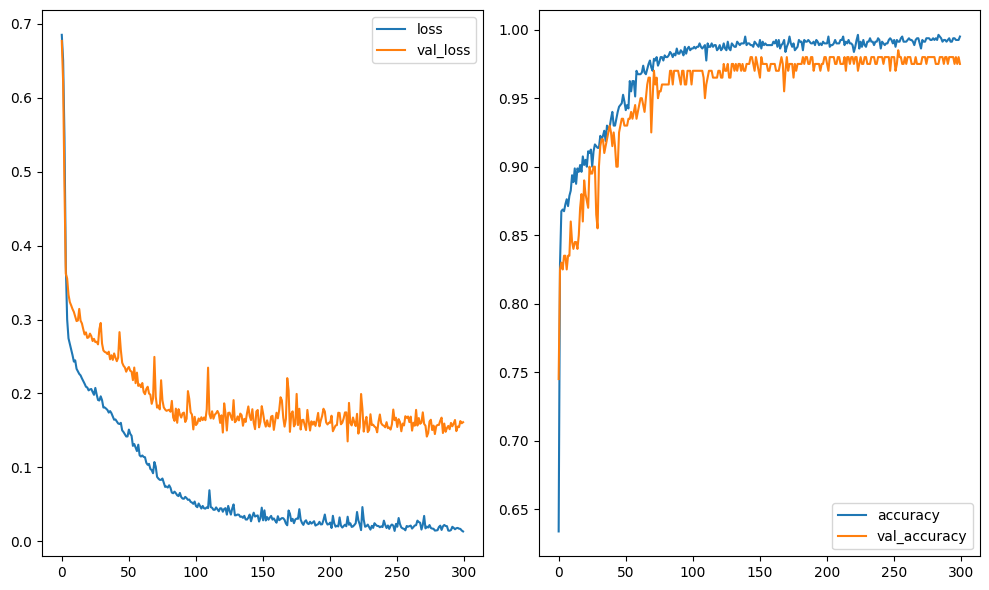

In [96]:
df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.lineplot(df_history[['loss', 'val_loss']], dashes=False, ax=ax[0])
sns.lineplot(df_history[['accuracy', 'val_accuracy']], dashes=False, ax=ax[1])

plt.tight_layout()
plt.show()

In [97]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9750


[0.1610933095216751, 0.9750000238418579]

In [98]:
def plot_decision_boundery(model, X, y, ax):
  x_min, y_min = np.min(X, axis=0)
  x_max, y_max = np.max(X, axis=0)

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)
  y_pred = np.round(y_pred)

  ax.contourf(xx, yy, y_pred.reshape(xx.shape), alpha=0.5, cmap=plt.cm.RdBu_r)
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)

313/313 [==============================] - 0s 1ms/step


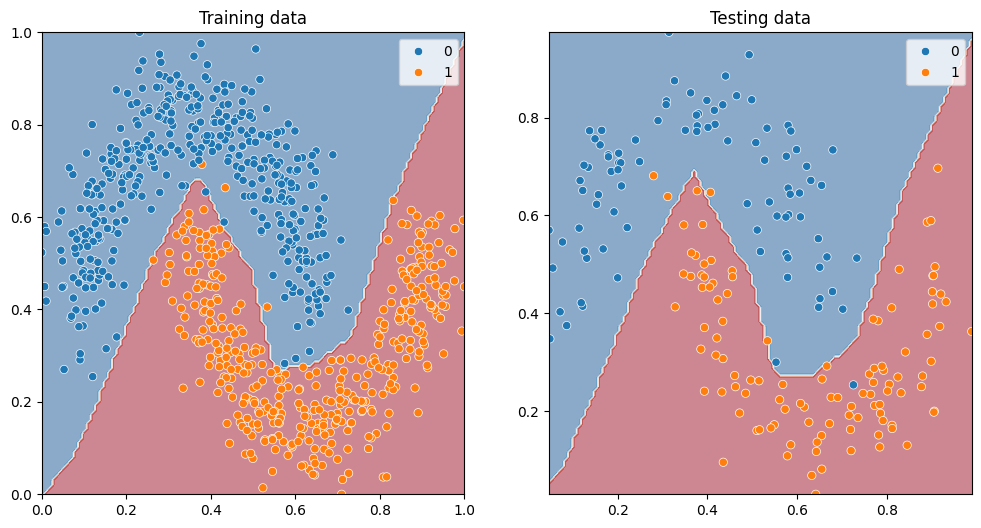

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title('Training data')
plot_decision_boundery(model, X_train, y_train, ax[0])

ax[1].set_title('Testing data')
plot_decision_boundery(model, X_test, y_test, ax[1])

plt.show()

<h1>Fashion-mnist Classification</h1>

In [100]:
mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [101]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [102]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [103]:
class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

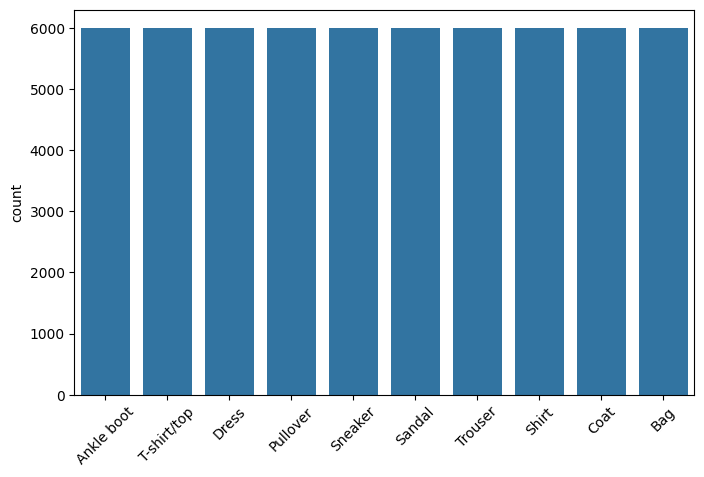

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.tick_params(axis='x', labelrotation=45)
sns.countplot(x=class_names[y_train], ax=ax)

plt.show()

In [105]:
def plot_images_pre_trained(X, y, row=3, col=3):
  fig, ax = plt.subplots(row, col, figsize=(10, 6))

  random_choices = np.random.choice(np.arange(len(X)), size=(row * col))

  for pos in range(row * col):
    i_index = pos // col
    j_index = pos % col

    ax[i_index, j_index].axis('off')
    ax[i_index, j_index].set_title(class_names[y[random_choices[pos]]])
    ax[i_index, j_index].imshow(X[random_choices[pos]], cmap='gray')

  plt.tight_layout()
  plt.show()

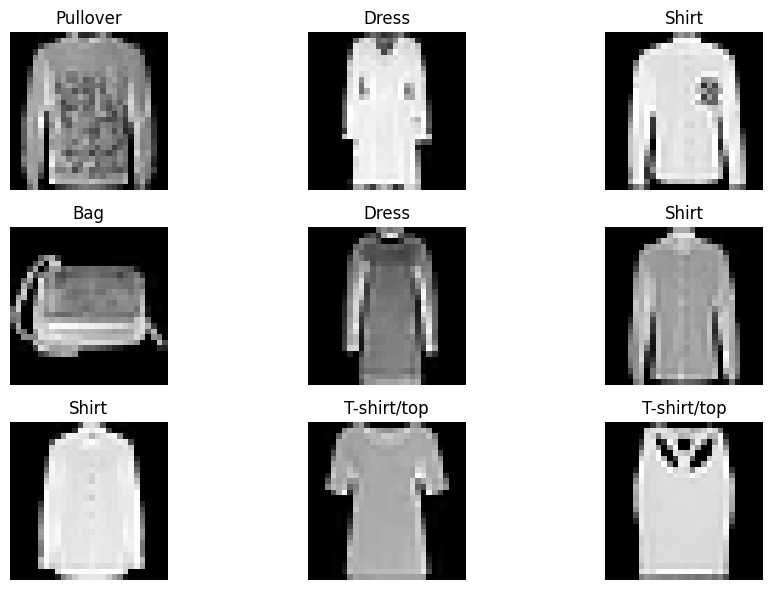

In [106]:
plot_images_pre_trained(X_train, y_train)

In [107]:
X_train[0, :10, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0]], dtype=uint8)

In [108]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255

In [109]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5)
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr if (epoch + 1) % 11 == 0 else lr * np.exp(-0.1))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train_norm, y_train, epochs=100, validation_data=(X_test_norm, y_test), callbacks=[early_stopping_callback, lr_decay_callback])

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6262 - accuracy: 0.7776 - val_loss: 0.4931 - val_accuracy: 0.8235 - lr: 9.0484e-04
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4269 - accuracy: 0.8472 - val_loss: 0.4233 - val_accuracy: 0.8459 - lr: 8.1873e-04
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3829 - accuracy: 0.8614 - val_loss: 0.4325 - val_accuracy: 0.8411 - lr: 7.4082e-04
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.8694 - val_loss: 0.3984 - val_accuracy: 0.8548 - lr: 6.7032e-04
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3420 - accuracy: 0.8730 - val_loss: 0.4085 - val_accuracy: 0.8519 - lr: 6.0653e-04
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3281 - accuracy: 0.8799 - val_loss: 0.3919 - val_accuracy: 0.8598 - lr: 5.4881e-04
Epoch 7/100
1875/1875 [=====

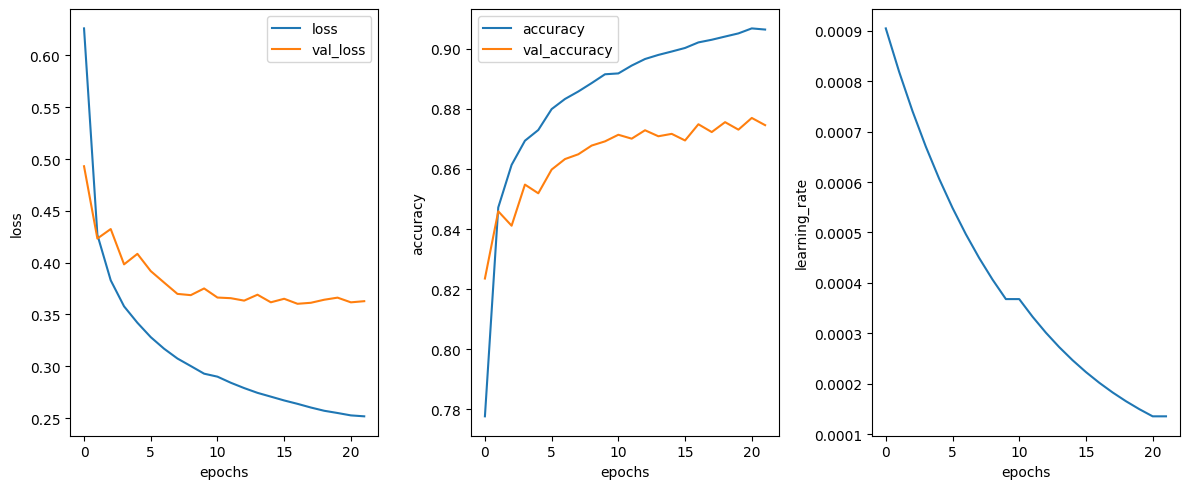

In [115]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

df_history = pd.DataFrame(history.history)

for i in range(3):
  ax[i].set_xlabel('epochs')

ax[0].set_ylabel('loss')
sns.lineplot(df_history[['loss', 'val_loss']], ax=ax[0], dashes=False)

ax[1].set_ylabel('accuracy')
sns.lineplot(df_history[['accuracy', 'val_accuracy']], ax=ax[1], dashes=False)

ax[2].set_ylabel('learning_rate')
sns.lineplot(df_history['lr'], ax=ax[2], dashes=False)

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 1ms/step


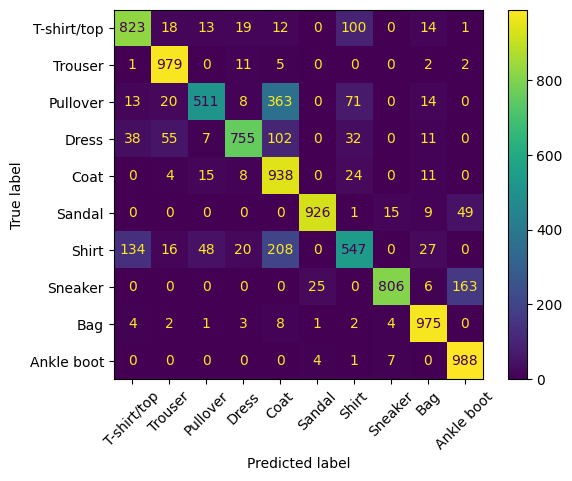

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(X_test), axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, xticks_rotation=45)

In [117]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_pred, target_names=class_names, output_dict=True)).T

,precision,recall,f1-score,support
T-shirt/top,0.812438,0.8230,0.817685,1000.0000
Trouser,0.894881,0.9790,0.935053,1000.0000
Pullover,0.858824,0.5110,0.640752,1000.0000
Dress,0.916262,0.7550,0.827851,1000.0000
Coat,0.573350,0.9380,0.711684,1000.0000
Sandal,0.968619,0.9260,0.946830,1000.0000
Shirt,0.703085,0.5470,0.615298,1000.0000
Sneaker,0.968750,0.8060,0.879913,1000.0000
Bag,0.912067,0.9750,0.942484,1000.0000
Ankle boot,0.821280,0.9880,0.896959,1000.0000


In [118]:
def plot_images(model, X, y, row=3, col=3):
  fig, ax = plt.subplots(row, col, figsize=(10, 6))
  y_pred = np.argmax(model.predict(X), axis=1)

  random_choices = np.random.choice(np.arange(len(X)), size=(row * col))

  for pos in range(row * col):
    i_index = pos // col
    j_index = pos % col

    ax[i_index, j_index].axis('off')
    ax[i_index, j_index].set_title(f'true: {class_names[y[random_choices[pos]]]}\n predicted: {class_names[y_pred[random_choices[pos]]]}',
                                   color='green' if y[random_choices[pos]] == y_pred[random_choices[pos]] else 'red')
    ax[i_index, j_index].imshow(X[random_choices[pos]], cmap='gray')

  plt.tight_layout()
  plt.show()

313/313 [==============================] - 1s 2ms/step


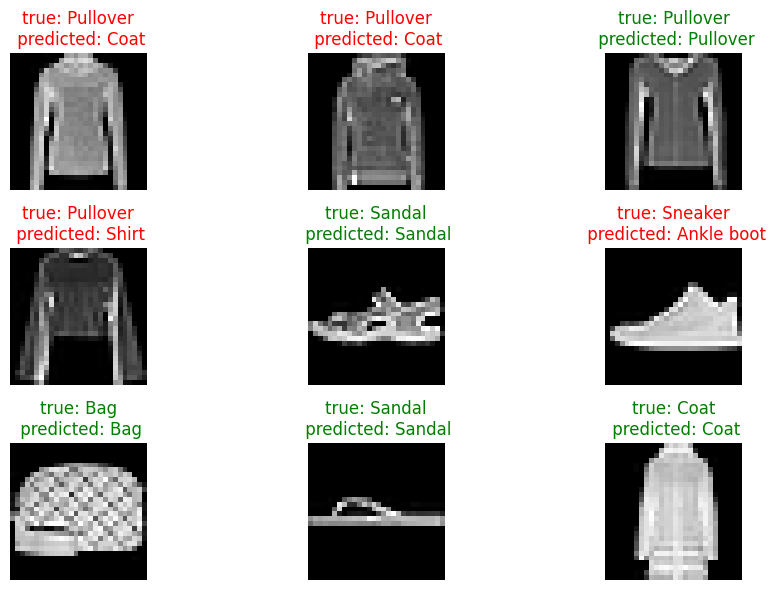

In [119]:
plot_images(model, X_test, y_test)

In [120]:
def plot_image_class(model, X, y, class_name, row=3, col=3):
  class_indices = np.where(class_names[y] == class_name)[0]

  fig, ax = plt.subplots(row, 2 * col, figsize=(10, 6))
  fig.suptitle(f'{class_name}', fontsize=18)

  y_pred_full = model.predict(X)
  y_pred = np.argmax(y_pred_full, axis=1)

  random_choices = np.random.choice(class_indices, size=(2 * row * col))

  for pos in np.arange(0, 2 * row * col, 2):
    i_index = pos // (2 * col)
    j_index = pos % (2 * col)

    ax[i_index, j_index].axis('off')
    ax[i_index, j_index].imshow(X[random_choices[pos]], cmap='gray')

    ax[i_index, j_index + 1].set_yticks([])
    ax[i_index, j_index + 1].set_title(f'predict: {class_names[y_pred[random_choices[pos]]]}',
                                       color='green' if y[random_choices[pos]] == y_pred[random_choices[pos]] else 'red')
    sns.barplot(x=range(len(class_names)), y=y_pred_full[random_choices[pos]], ax=ax[i_index, j_index + 1])

  plt.tight_layout()
  plt.show()

313/313 [==============================] - 0s 1ms/step


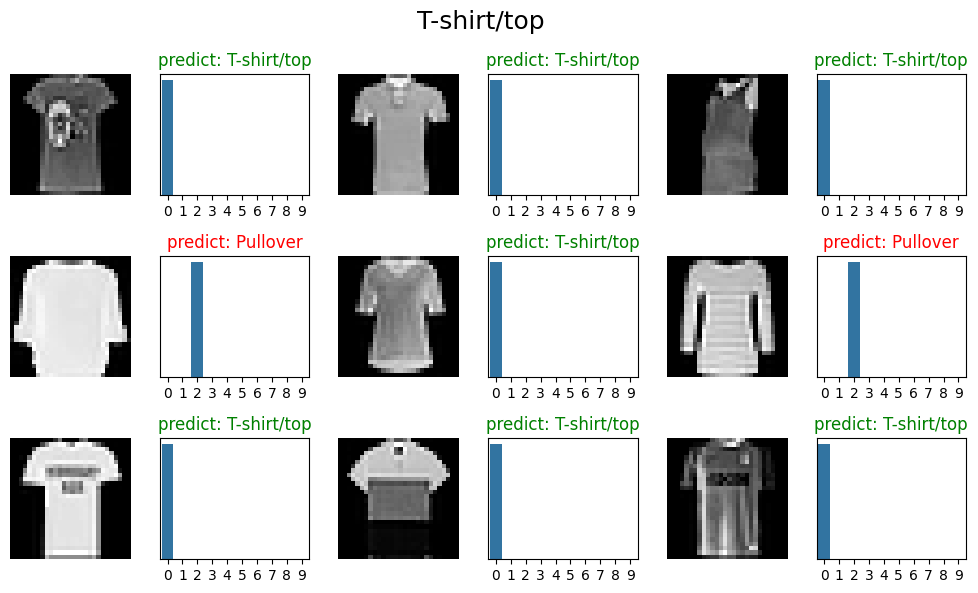

In [122]:
plot_image_class(model, X_test, y_test, class_name='T-shirt/top')